In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine=load_wine()
wine.data.shape

(178, 13)

In [3]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(wine.data,wine.target,test_size=0.3)

xtrain.shape

(124, 13)

In [8]:
clf=tree.DecisionTreeClassifier(criterion="entropy",random_state=30)
clf=clf.fit(xtrain,ytrain)
score=clf.score(xtest,ytest)
score

0.9444444444444444

In [9]:
import graphviz

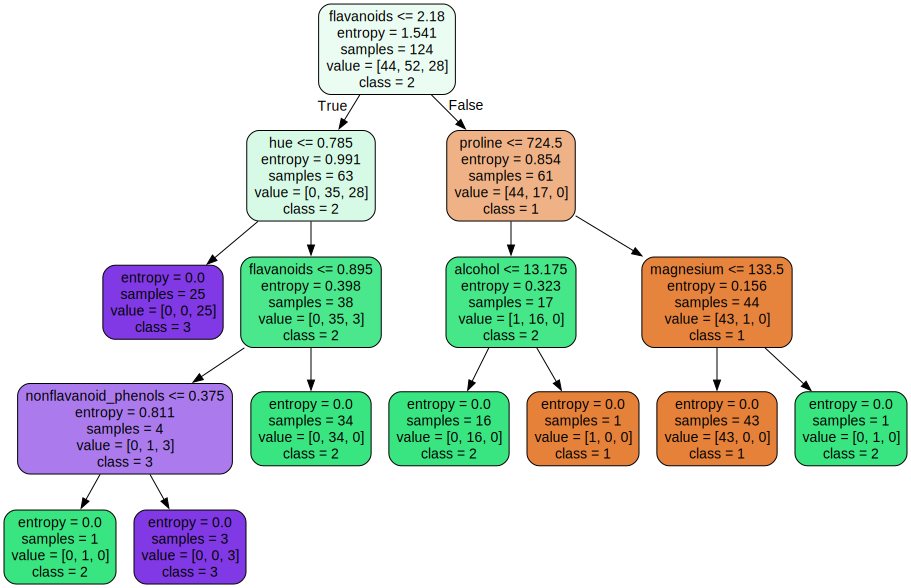

In [10]:
dot_data=tree.export_graphviz(clf
                              ,out_file=None
                              ,feature_names=wine.feature_names
                              ,class_names=["1","2","3"]
                              ,rounded=True
                              ,filled=True)
graph=graphviz.Source(dot_data)
graph

In [11]:
clf.feature_importances_

array([0.02871555, 0.        , 0.        , 0.        , 0.03603585,
       0.        , 0.46296617, 0.01698331, 0.        , 0.        ,
       0.24752561, 0.        , 0.2077735 ])

**带*表示解包，取出每一个元素**

In [12]:
[*zip(wine.feature_names,clf.feature_importances_)]

[('alcohol', 0.028715550681728513),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.036035854928652404),
 ('total_phenols', 0.0),
 ('flavanoids', 0.46296617277902696),
 ('nonflavanoid_phenols', 0.016983311295845824),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.0),
 ('hue', 0.24752561118964908),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.2077734991250972)]

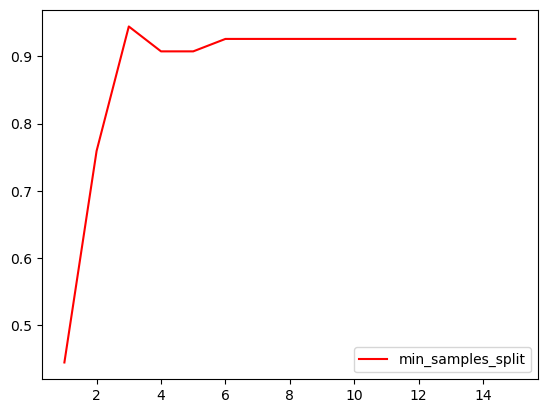

3

In [13]:
import matplotlib.pyplot as plt
test=[]
for i in range(15):
    clf=tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    ,max_depth=i+1
                                    #,min_samples_leaf=1
                                    #,min_samples_split=i+2
                                    )
    clf=clf.fit(xtrain,ytrain)
    score=clf.score(xtest,ytest)
    test.append(score)
plt.plot(range(1,16),test,c="r",label="min_samples_split")
plt.legend()
plt.show()
test.index(max(test)) + 1

In [14]:
clf.apply(xtest)

array([28,  6,  8,  4,  4, 30, 15,  4, 30,  4, 30, 13, 13, 13,  9,  4, 30,
        4,  4, 30,  4, 30, 10, 13, 15, 30,  4, 30, 30, 30, 10, 22,  4, 30,
        4, 22,  8, 30, 22, 15, 22,  6, 22, 22, 30, 22,  8, 30, 13,  9, 22,
        6, 26, 30], dtype=int64)

In [15]:
clf.predict(xtest)

array([0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0,
       1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 0])